In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline
from utils import es as es

Angle: 150.0
Space difference (m): -0.173150878009
Time difference (s): -0.000506289116985
Samples difference: -8 (-8.10062587176)


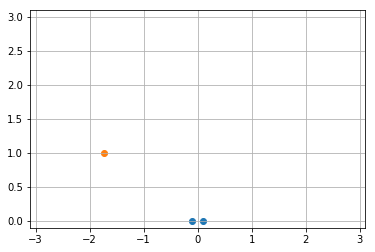

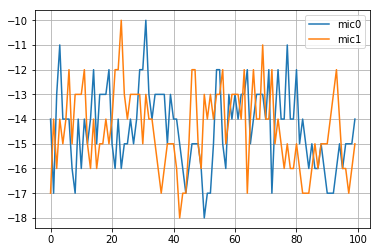

In [59]:
d = 0.2  # distance in m
c = 342.  # speed of sound in m/s
radius = 2.  # radius of semicircle in m

mics = np.array([[-d / 2., 0.], [d / 2., 0.]])

degs = np.arange(0, 190, 10) * np.pi / 180.  # degs in rad

# random choice
ang = np.random.choice(degs)
ang = 150 * np.pi / 180.
pos = np.array([radius * np.cos(ang), radius * np.sin(ang)])
plt.scatter([mics[0][0], mics[1][0]], [mics[0][1], mics[1][1]])
plt.scatter([pos[0]], [pos[1]])
plt.xlim([-3.1, 3.1])
plt.ylim([-.1, 3.1])
plt.grid()
print "Angle: {}".format(ang * 180 / np.pi)

s_diff = np.lainalg.norm(pos - mics[0]) - np.linalg.norm(pos - mics[1])
print "Space difference (m): {}".format(s_diff)
t_diff = s_diff / c
print "Time difference (s): {}".format(t_diff)

fs, y = wavfile.read('/home/enea/sample1.wav')

# now delay in terms of n_samples 
samples_diff = np.round(t_diff * fs).astype('int32')

print "Samples difference: {} ({:8})".format(samples_diff, t_diff * fs)

if samples_diff > 0:
    rec1 = y[samples_diff:]
    rec2 = y[:-samples_diff]
else:
    rec1 = y[:samples_diff]
    rec2 = y[-samples_diff:]
plt.figure()
plt.plot(rec1[:100], label='mic0')
plt.plot(rec2[:100], label='mic1')
plt.legend()
plt.grid()

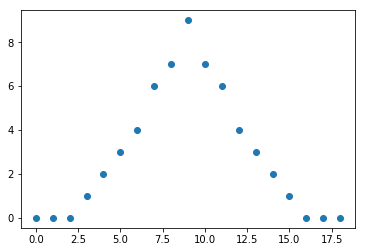

In [66]:
s = []
for i in range(0, 190, 10):
    ang = i * np.pi / 180.
    pos = np.array([radius * np.cos(ang), radius * np.sin(ang)])

    s_diff = np.linalg.norm(pos - mics[0]) - np.linalg.norm(pos - mics[1])
    t_diff = s_diff / c

    s.append(np.round(t_diff * fs).astype('int32'))
plt.plot(- np.abs(s) + 9, 'o')